Lojistik regresyon, isminde “regresyon” geçmesine rağmen bir sınıflandırma algoritmasıdır. Yani görseldeki hayvanın kedi mi, köpek mi olduğu veya verilmiş olan bilgilerin bir erkeğe mi yoksa bir kadına mı ait olduğunu tahmin etme gibi iki sınıflı sınıflandırma problemlerinde sıkça kullanılır.

Lojistik regresyon, varsayılan sınıfın (örneğin birinci sınıf) olasılığını modeller.

Örneğin, insanların cinsiyetini boylarından erkek veya kadın olarak modelliyorsak, o zaman birinci sınıf erkek olabilir ve lojistik regresyon modeli, bir kişinin boyuna göre erkek olma olasılığı olarak veya daha resmi olarak yazılabilir:

> P(cinsiyet=erkek|boy)

Başka bir şekilde yazıldığında, bir girdinin (X) varsayılan sınıfa (Y=1) ait olma olasılığını modelliyoruz, bunu resmi olarak şu şekilde yazabiliriz:

> P(X) = P(Y=1|X)

Lojistik Regresyon, sınıflandırma problemlerinde kullanılan, tahmine dayalı bir analiz algoritması olan ve olasılık kavramına dayanan bir Makine Öğrenimi algoritmasıdır.

Lojistik regresyon hipotezi, maliyet fonksiyonunu 0 ile 1 arasında sınırlama eğilimindedir.. Bu nedenle doğrusal fonksiyonlar, lojistik regresyon hipotezine göre mümkün olmayan 1'den büyük veya 0'dan küçük bir değere sahip olabileceğinden onu temsil edemez.

Lojistik regresyonun, lineer regresyon ile arasındaki en büyük farkı iki sınıfı birbirinden ayıracak çizgiyi nasıl uyguladığıdır (fit). Lineer regresyon, optimum çizgiyi çizmek için “En Küçük Kareler Yöntemi” (Least Squares) kullanırken, lojistik regresyon “Maksimum Olabilirlik” (Maximum Likelihood) kullanır.

> 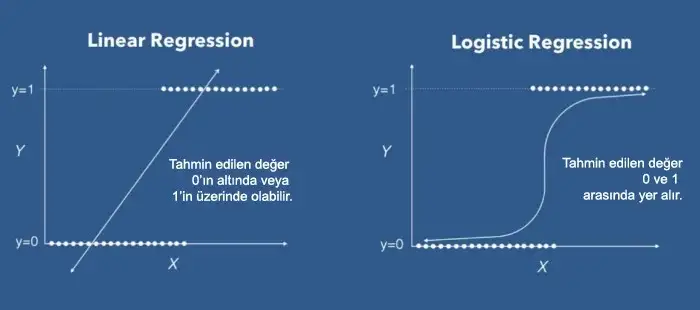

Lojistik regresyon, sınıflandırma yapmak için Sigmoid (Lojistik) Fonksiyonu kullanır. Sigmoid fonksiyonu “S” şeklinde bir eğridir.

> 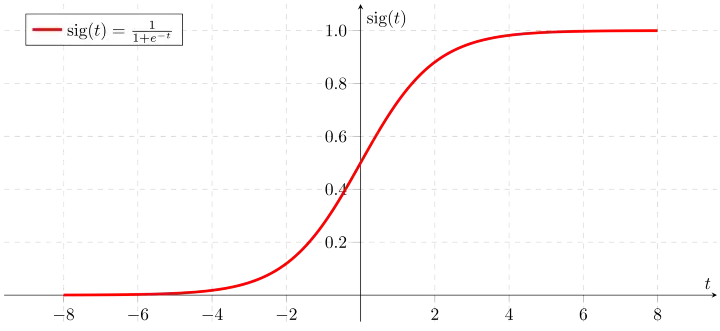

Sigmoid fonksiyonu basitçe, verilerimizi 0 ve 1 arasına sıkıştırmak için kullanılan fonksiyondur. Bu fonksiyon sayesinde sınıflandırma yapabiliriz.

> 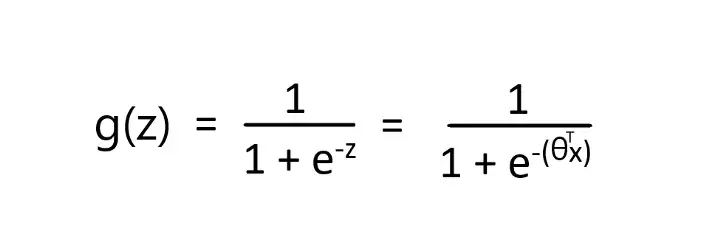

**Bir örnek yapalım:**
> 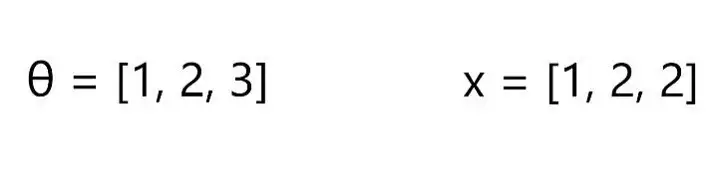
    İşlemleri yapmamız için θ (katsayı/ağırlık) ve x (girdi değerleri) değerlerini almamız gerekiyor.
    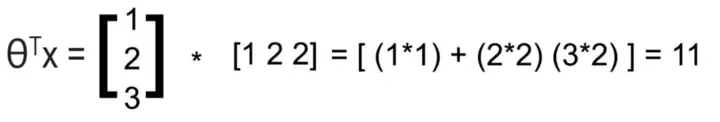
    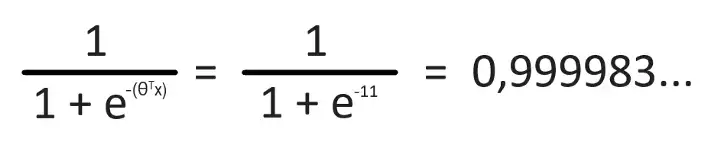
    Yani 0,999983 olasılıkla sonuç 1 olur. Bu değer, Lojistik Regresyonun’un eşik değeri (threshold) olan 0.5'in üzerinde olduğu için sınıflandırma sonucu 1 olur.
    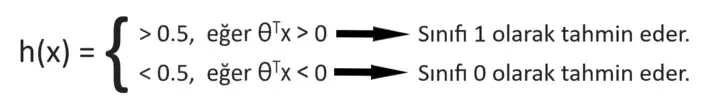
    
Rastgele verilmiş ağırlıklar üzerinden bir tahmin yaptık ama doğru (optimum) parametreleri nasıl buluyoruz?
### Doğru parametreleri nasıl buluyoruz?
Öncelikle tekil bir sonuç için Maliyet (Cost) Fonksiyonuna bakalım.
> 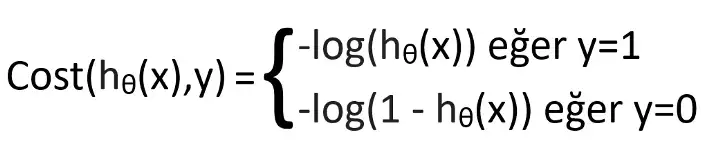
Yani gerçek y değeri 1 ise üstteki, 0 ise alttaki formül kullanılıyor. Bu formülü tek satırda yazmak gerekirse:
> 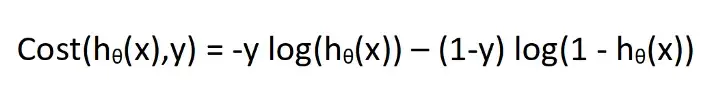

**Maliyet Fonksiyonuna bir grafik ile bakalım.**

> 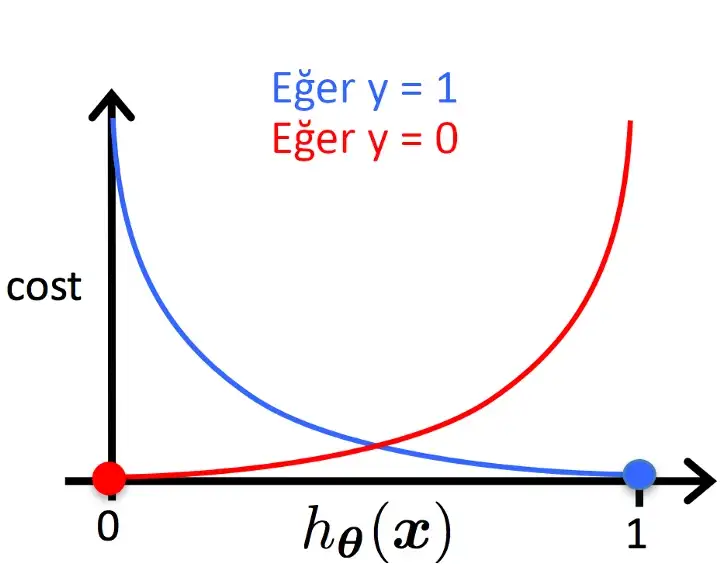

Eğer y = 1, tahmin edilen değerde 1 ise cost (y ekseni) 0 olur ama y = 1 iken tahmin edilen değer 0 ise cost sonsuza gider. Diğer taraftan y = 0, tahmin edilen değerde 0 ise cost 0 olur ama y = 0 iken tahmin edilen değer 1 ise cost sonsuza gider. Bu şekilde yanlış yaptıklarını cezalandırabilir.

Bu formül bize tekil bir değer için sonuç verir. Bütün veri seti içerisinde değerlendirme yapmak için bu formülü biraz değiştirmemiz gerekecek.
> 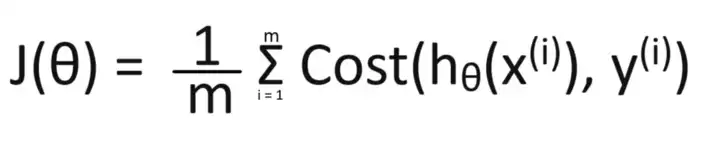

**Avantajları:**
* Lojistik regresyonun uygulanması, yorumlanması kolaydır.
* Veri seti doğrusal olarak ayrılabiliyorsa oldukça iyi performans gösterir.
* Overfitting’e daha az meyillidir ama büyük veri setlerinde overfit olabilir.

**Dezavantajları:**

* Gözlem sayısı özellik sayısından azsa, Lojistik Regresyon kullanılmamalıdır, aksi takdirde overfit olabilir.
* Lojistik regresyonun ayrım yapabilmesi için veri setinin doğrusal olarak ayrılabiliyor olması lazım.

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Verisetinin train ve test olarak ayrılması
from sklearn.metrics import accuracy_score  # Accuracy score değerinin hesaplanması
from sklearn.metrics import confusion_matrix  # Karmaşıklık matrisinin ısı haritası olarak çizilmesi
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = np.arange(100).reshape(-1,1)
y = np.array([0]*50 + [1]*50)

In [3]:
X[:10]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=.3)

In [6]:
model = LogisticRegression().fit(X_train,y_train)

In [7]:
y_pred = model.predict(X_test)

In [8]:
print('Accucarcy score: ', accuracy_score(y_test, y_pred))

Accucarcy score:  1.0


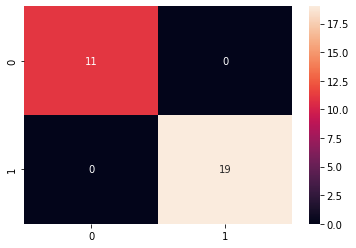

In [9]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
plt.show()

**Kaynakça:**
* https://mfakca.medium.com/lojistik-regresyon-nedir-nas%C4%B1l-%C3%A7al%C4%B1%C5%9F%C4%B1r-4e1d2951c5c1 
* https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148